## Librerias

In [1]:
import pandas as pd
import numpy as np
import urllib.request
from PIL import Image

import ML_tool_box_basic_plot as tbb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

pd.set_option('display.max_columns', None) 

## Data

In [2]:
### Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv("data/portatiles_train.csv", index_col = 0)
df.index.name = None

## Data exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company                  912 non-null    object 
 1   TypeName                 912 non-null    object 
 2   Inches                   912 non-null    float64
 3   ScreenResolution         912 non-null    object 
 4   Cpu                      912 non-null    object 
 5   Ram                      912 non-null    object 
 6   Memory                   912 non-null    object 
 7   Gpu                      912 non-null    object 
 8   OpSys                    912 non-null    object 
 9   Weight                   912 non-null    object 
 10  Price_in_euros           912 non-null    float64
 11  ram_gb                   912 non-null    int64  
 12  weight_kg                912 non-null    float64
 13  cluster_Company          912 non-null    int64  
 14  median_price_company     912 

## Data processing

In [4]:
# Outlier

# filtro = df["Price_in_euros"] > 6000
# df.loc[filtro]

In [5]:
# df.drop(index=200, inplace=True)
# filtro = df["Price_in_euros"] > 6000
# df.loc[filtro]

In [6]:
target = "Price_in_euros"

Cambiamos el valor de varias variables a category para poder usarlas con mejores garantias en algunos modelos.

In [7]:
columnas_type_category = ['cluster_Company', 'cluster_Inches', 'cluster_Resolution_Type', 'cluster_Cpu_Class', 'cluster_Gpu', 'cluster_OS']
df[columnas_type_category] = df[columnas_type_category].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Company                  912 non-null    object  
 1   TypeName                 912 non-null    object  
 2   Inches                   912 non-null    float64 
 3   ScreenResolution         912 non-null    object  
 4   Cpu                      912 non-null    object  
 5   Ram                      912 non-null    object  
 6   Memory                   912 non-null    object  
 7   Gpu                      912 non-null    object  
 8   OpSys                    912 non-null    object  
 9   Weight                   912 non-null    object  
 10  Price_in_euros           912 non-null    float64 
 11  ram_gb                   912 non-null    int64   
 12  weight_kg                912 non-null    float64 
 13  cluster_Company          912 non-null    category
 14  median_price_

In [8]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,ram_gb,weight_kg,cluster_Company,median_price_company,median_price_typename,cluster_Inches,median_price_inches,Resolution_Type,Resolution_Pixels,Touchscreen,cluster_Resolution_Type,median_price_screen,CPU_Manufacturer,CPU_Model,CPU_Frequency,CPU_Model_Class,cluster_Cpu_Class,median_price_cpu_model,SSD_(GB),HDD_(GB),Flash_Storage_(GB),Hybrid_(GB),OtherTypeStorage_(GB),Gpu_Company,Gpu_Family,Gpu_Model,Integrada_Externa,cluster_Gpu,median_price_Gpu,cluster_OS,median_price_OS
755,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00,8,1.86,0,964.925,685.0,1,750.000000,1920x1080,2073600,0,3,1103.00,Intel,Core i3 6006U,2.0,Core i,2,1180.7,256,0,0,0,0,Intel,HD Graphics,520,0,3,1002.578333,4,1043.00
618,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01,16,2.59,0,964.925,1479.0,1,750.000000,1920x1080,2073600,0,3,1103.00,Intel,Core i7 6700HQ,2.6,Core i,2,1180.7,0,1024,0,0,0,Nvidia,GeForce GTX,960<U+039C>,1,5,1420.000000,4,1043.00
909,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00,8,2.04,0,964.925,685.0,1,750.000000,1920x1080,2073600,0,3,1103.00,Intel,Core i7 7500U,2.7,Core i,2,1180.7,0,1024,0,0,0,Nvidia,GeForce,930MX,1,3,1002.578333,4,1043.00
2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,8,1.34,4,1678.800,1499.0,4,1412.331667,1440x900,1296000,0,2,1310.55,Intel,Core i5,1.8,Core i,2,1180.7,0,0,128,0,0,Intel,HD Graphics,6000,0,3,1002.578333,3,1518.55
286,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00,4,2.25,0,964.925,685.0,1,750.000000,1920x1080,2073600,0,3,1103.00,Intel,Core i3 6006U,2.0,Core i,2,1180.7,0,1024,0,0,0,AMD,Radeon R5 M,M430,1,1,505.140625,0,471.75


In [9]:
features_all_RF = df.iloc[:, [11,14,15,17,20,22,28,29,30,31,32,37,39,41]]
columnas_no_object = features_all_RF.select_dtypes(exclude=['object'])
features_num = list(columnas_no_object.columns)
features_num

['ram_gb',
 'median_price_company',
 'median_price_typename',
 'median_price_inches',
 'Touchscreen',
 'median_price_screen',
 'median_price_cpu_model',
 'SSD_(GB)',
 'HDD_(GB)',
 'Flash_Storage_(GB)',
 'Hybrid_(GB)',
 'Integrada_Externa',
 'median_price_Gpu',
 'median_price_OS']

## Test de Person para correlación entre variables y su significancia ##
                   Feature      Corr Direction        p-value
1                   ram_gb  0.738922         +  3.244431e-158
10                SSD_(GB)  0.669151         +  1.834127e-119
4    median_price_typename  0.626275         +  1.695039e-100
7      median_price_screen  0.605574         +   2.319505e-92
14        median_price_Gpu  0.524459         +   1.379023e-65
6        Resolution_Pixels  0.493671         +   3.391106e-57
9   median_price_cpu_model  0.482603         +   2.204246e-54
5      median_price_inches  0.476890         +   5.695751e-53
8            CPU_Frequency  0.427116         +   9.746963e-42
3     median_price_company  0.388648         +   2.965206e-34
15         median_price_OS  0.331353         +   8.247184e-25
2                weight_kg  0.197086         +   1.940861e-09
11                HDD_(GB)  0.076017         -   2.168555e-02
0                   Inches  0.071043         +   3.193455e-

['ram_gb',
 'median_price_company',
 'median_price_typename',
 'median_price_inches',
 'Touchscreen',
 'median_price_screen',
 'median_price_cpu_model',
 'SSD_(GB)',
 'HDD_(GB)',
 'Flash_Storage_(GB)',
 'Hybrid_(GB)',
 'Integrada_Externa',
 'median_price_Gpu',
 'median_price_OS']

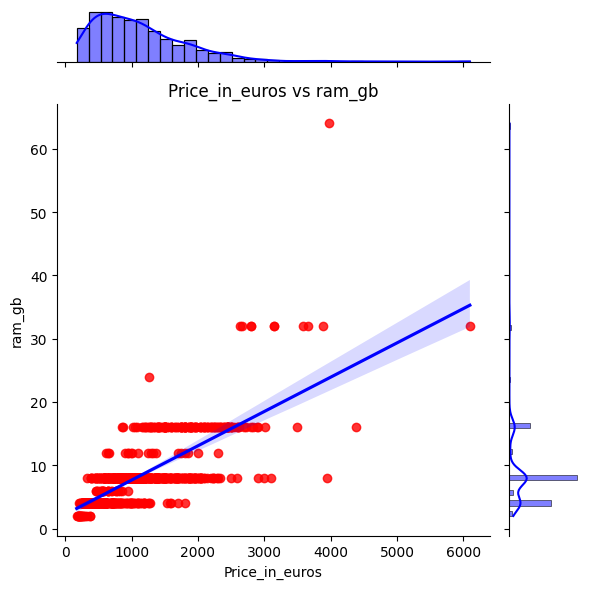

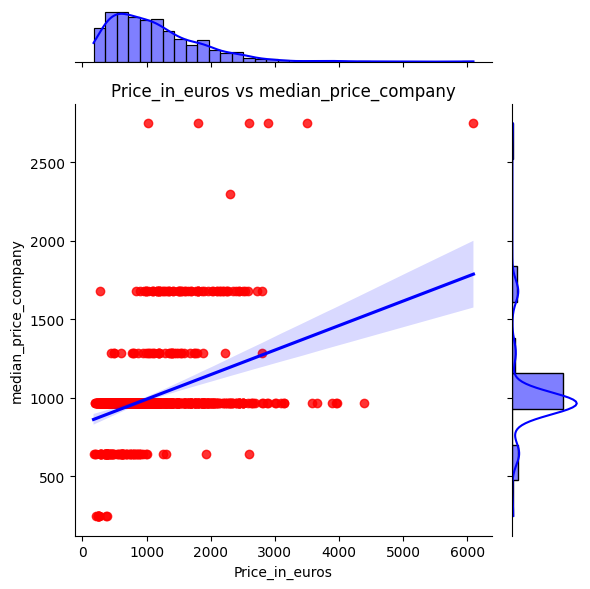

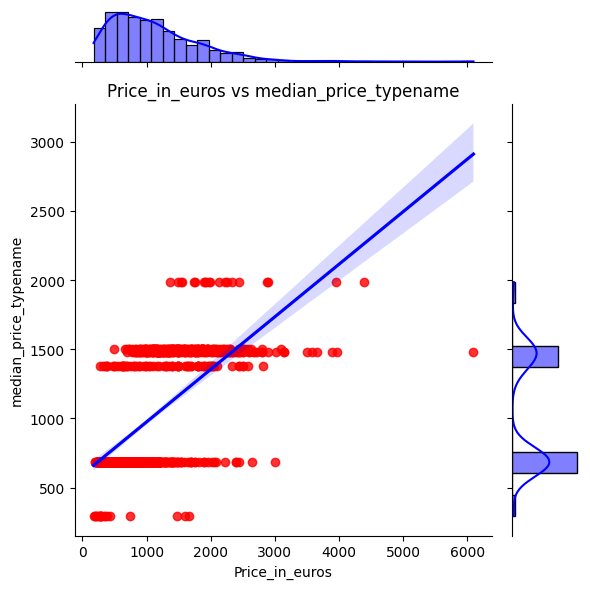

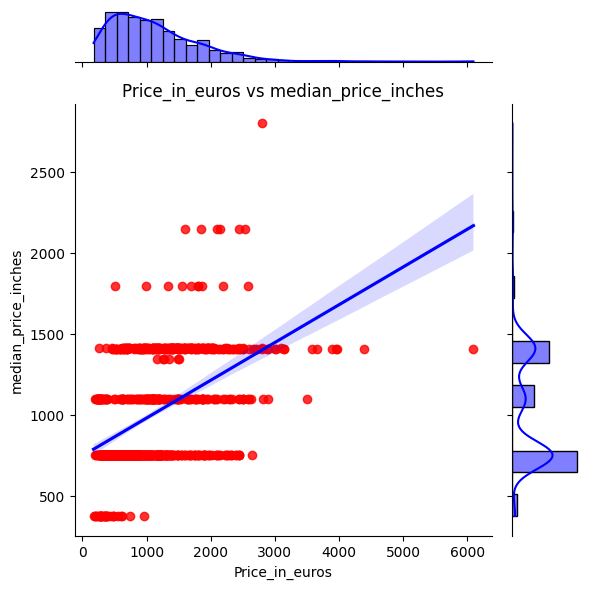

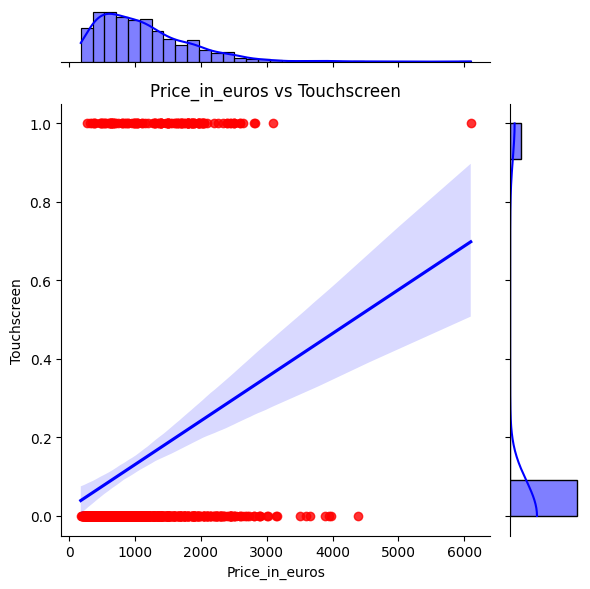

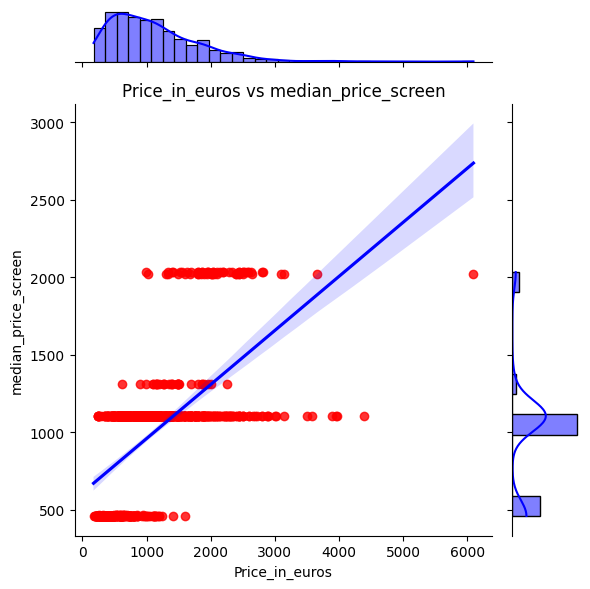

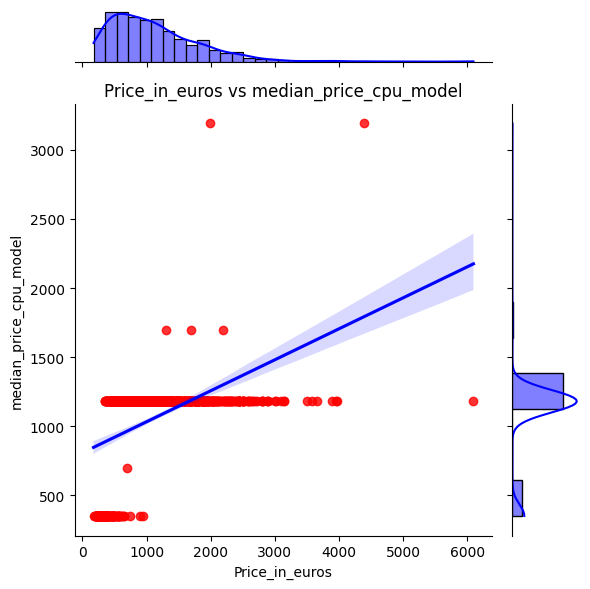

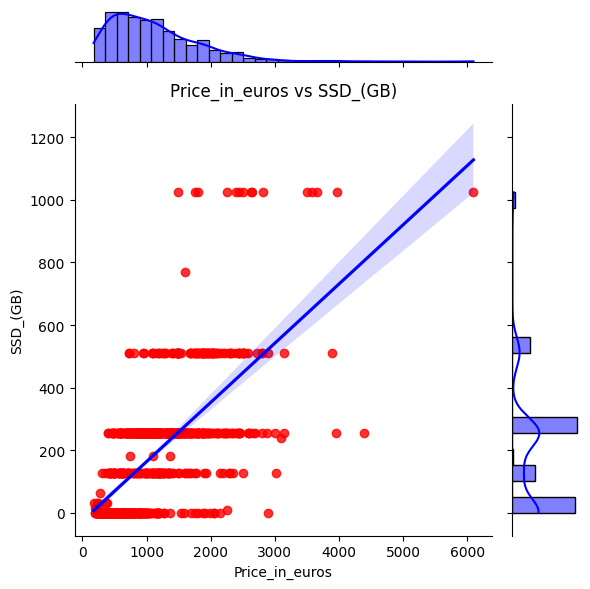

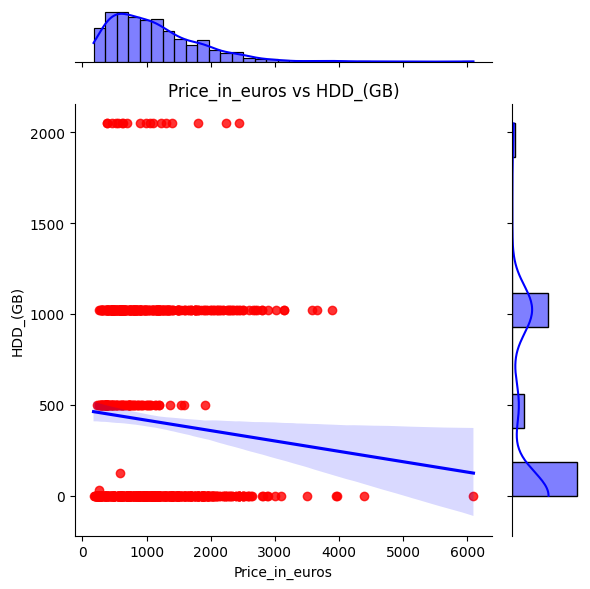

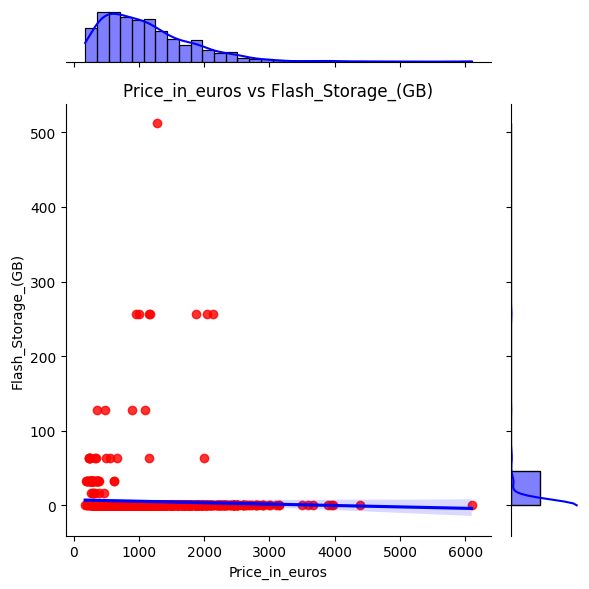

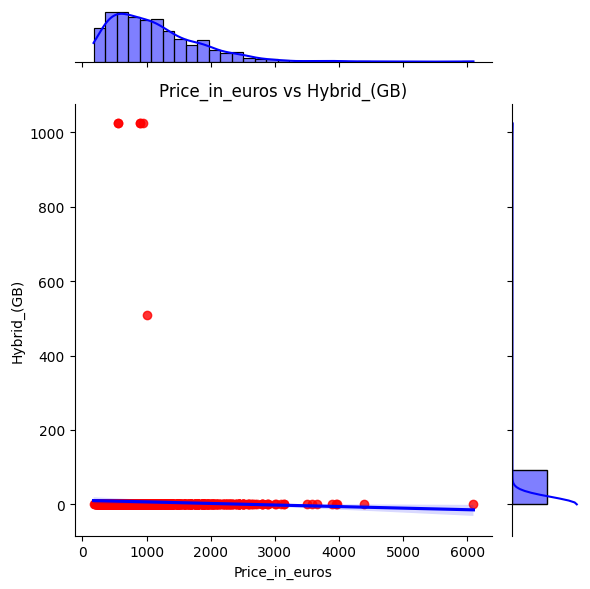

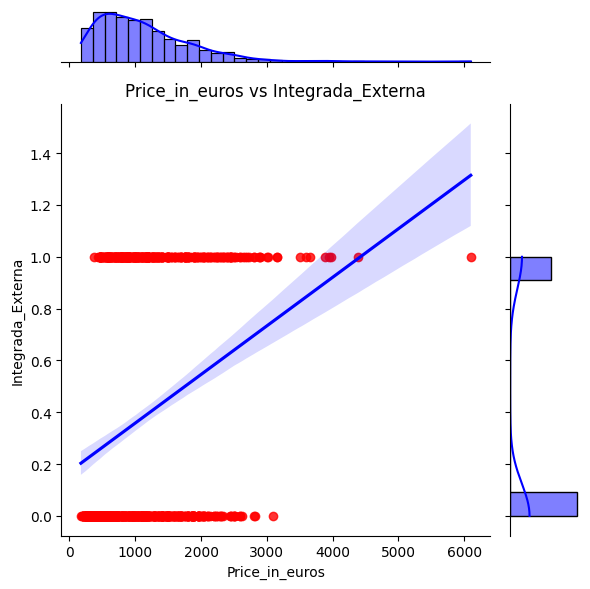

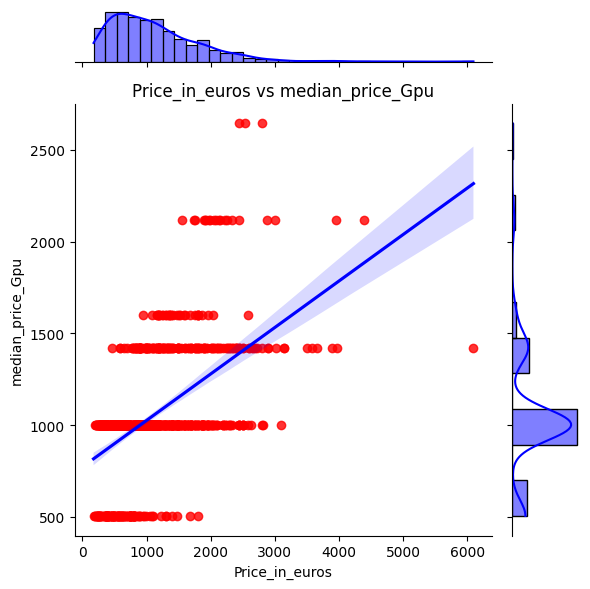

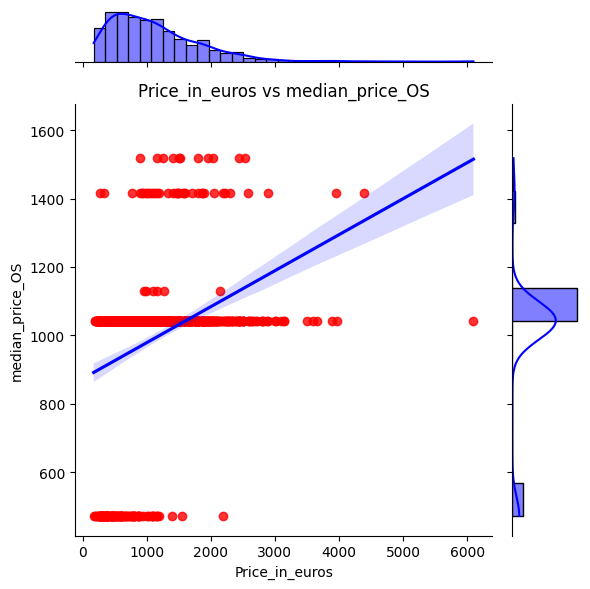

In [10]:
tbb.REGRE_FN_BI_FeaNum_hist_scatter_plot_with_regression(df, target, columnas=features_num, umbral_categorias_feature=2)

In [11]:
df_col = pd.DataFrame(data=df.columns, columns=["Name"])
df_col

,Name
0,Company
1,TypeName
2,Inches
3,ScreenResolution
4,Cpu
5,Ram
6,Memory
7,Gpu
8,OpSys
9,Weight


In [12]:
features_all_RF_def = df.iloc[:, [11,14,15,17,22,28,29,37,39,41]]
columnas_no_object = features_all_RF_def.select_dtypes(exclude=['object'])
features_num_def = list(columnas_no_object.columns)
features_num_def

['ram_gb',
 'median_price_company',
 'median_price_typename',
 'median_price_inches',
 'median_price_screen',
 'median_price_cpu_model',
 'SSD_(GB)',
 'Integrada_Externa',
 'median_price_Gpu',
 'median_price_OS']

-----------------------------------------------------------------------------------------------------------------

## Modelado

### 1. Definir X e y

In [13]:
X = df[features_num_def].copy()
y = df['Price_in_euros'].copy()
X.shape

(912, 10)

In [14]:
X

,ram_gb,median_price_company,median_price_typename,median_price_inches,median_price_screen,median_price_cpu_model,SSD_(GB),Integrada_Externa,median_price_Gpu,median_price_OS
755,8,964.925,685.000,750.000000,1103.00,1180.700,256,0,1002.578333,1043.00
618,16,964.925,1479.000,750.000000,1103.00,1180.700,0,1,1420.000000,1043.00
909,8,964.925,685.000,750.000000,1103.00,1180.700,0,1,1002.578333,1043.00
2,8,1678.800,1499.000,1412.331667,1310.55,1180.700,0,0,1002.578333,1518.55
286,4,964.925,685.000,750.000000,1103.00,1180.700,0,1,505.140625,471.75
...,...,...,...,...,...,...,...,...,...,...
28,8,964.925,685.000,750.000000,1103.00,1180.700,256,0,505.140625,1043.00
1160,8,964.925,1378.495,1412.331667,1103.00,1180.700,256,0,1002.578333,1043.00
78,8,964.925,685.000,750.000000,1103.00,1180.700,0,0,1002.578333,471.75
23,4,964.925,685.000,750.000000,459.00,350.616,0,0,505.140625,471.75


In [15]:
y.shape

(912,)

### 2. Dividir X_train, X_test, y_train, y_test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [17]:
X_train.head(5)

,ram_gb,median_price_company,median_price_typename,median_price_inches,median_price_screen,median_price_cpu_model,SSD_(GB),Integrada_Externa,median_price_Gpu,median_price_OS
1118,8,964.925,1984.0,1409.000000,1103.000,1180.7,0,1,1420.000000,1417.50
153,16,964.925,1479.0,750.000000,1103.000,1180.7,512,1,1420.000000,1043.00
275,8,1678.800,1499.0,1412.331667,2032.333,1180.7,512,0,1600.825000,1518.55
1100,4,964.925,685.0,1097.500000,1103.000,1180.7,0,0,1002.578333,1417.50
131,16,964.925,685.0,1409.000000,1103.000,1180.7,256,0,505.140625,1043.00


In [18]:
y_train

1118    2899.00
153     1249.26
275     1958.90
1100    1030.99
131     1396.00
         ...   
578      389.00
996      549.00
770     1859.00
407      306.00
418     1943.00
Name: Price_in_euros, Length: 729, dtype: float64

### 3. Baseline de modelos


In [19]:
model = XGBRegressor(max_depth = 5, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

### 4. Sacar métricas, valorar los modelos 

Recuerda que en la competición se va a evaluar con la métrica de RMSE.

In [20]:
predict = model.predict(X_test)

mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mse)
rmse

335.9389518215758

In [21]:
from sklearn.model_selection import cross_val_score


# Definir el modelo
model_cross = XGBRegressor(max_depth=5, random_state=42)

# Realizar el Cross-Validation con 5 folds
scores = cross_val_score(model_cross, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calcular el RMSE promedio y mostrar el resultado
rmse_scores = np.sqrt(-scores)
print(f"RMSE por pliegue: {rmse_scores}")
print(f"RMSE promedio: {rmse_scores.mean()}")

RMSE por pliegue: [283.99000012 296.01113828 290.21909475 275.82204568 356.68759257]
RMSE promedio: 300.5459742803297


In [22]:
from sklearn.model_selection import GridSearchCV

# Definir el modelo
model = XGBRegressor(random_state=42)

# Definir los hiperparámetros que se evaluarán en el Grid Search
param_grid = {
    'max_depth': [ 10, 15, 20],
    'n_estimators': [100, 150, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0.1, 1, 10]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', 
                           verbose=1, n_jobs=-1)

# Ajustar el modelo en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros y el RMSE asociado
print(f"Mejores parámetros: {grid_search.best_params_}")
best_rmse = np.sqrt(-grid_search.best_score_)
print(f"Mejor RMSE: {best_rmse}")

Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
Mejores parámetros: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 15, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}
Mejor RMSE: 286.2142877379371


Fitting 5 folds for each of 11664 candidates, totalling 58320 fits
Mejores parámetros: {'colsample_bytree': 0.6, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 500, 'reg_alpha': 1, 'reg_lambda': 0.1, 'subsample': 0.6}
Mejor RMSE: 268.28821970880443


Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
Mejores parámetros: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 15, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}
Mejor RMSE: 286.2142877379371

In [42]:
from sklearn.model_selection import cross_val_score

# Definir el modelo
xgb_regressor = XGBRegressor(
    colsample_bytree=0.8, 
    gamma=0, 
    learning_rate=0.05, 
    max_depth=15, 
    n_estimators=100, 
    reg_alpha=0, 
    reg_lambda=1, 
    subsample=0.8
)

# Realizar el Cross-Validation con 5 folds
scores = cross_val_score(xgb_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calcular el RMSE promedio y mostrar el resultado
rmse_scores = np.sqrt(-scores)
print(f"RMSE por pliegue: {rmse_scores}")
print(f"RMSE promedio: {rmse_scores.mean()}")

RMSE por pliegue: [257.96249497 279.06658123 265.43413676 257.66888079 373.90330164]
RMSE promedio: 286.8070790794683


In [43]:
xgb_regressor.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [44]:
predict = xgb_regressor.predict(X_test)

mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mse)
rmse

307.83180529486174

-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 1. Carga los datos de `test.csv` para predecir.


In [45]:
X_pred = pd.read_csv("data/portatiles_test.csv", index_col = 0)
X_pred.index.name = None
X_pred.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,ram_gb,weight_kg,cluster_Company,median_price_company,median_price_typename,cluster_Inches,median_price_inches,Resolution_Type,Resolution_Pixels,Touchscreen,cluster_Resolution_Type,median_price_screen,CPU_Manufacturer,CPU_Model,CPU_Frequency,CPU_Model_Class,cluster_Cpu_Class,median_price_cpu_model,SSD_(GB),HDD_(GB),Flash_Storage_(GB),Hybrid_(GB),OtherTypeStorage_(GB),Gpu_Company,Gpu_Family,Gpu_Model,Integrada_Externa,cluster_Gpu,median_price_Gpu,cluster_OS,median_price_OS
209,Lenovo,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg,16,2.400,0,964.925,1479.000,1.0,750.0,1920x1080,2073600,0,3.0,1103.0,Intel,Core i7 7700HQ,2.8,Core i,2,1180.700,256,0,0,0,0,Nvidia,GeForce GTX,1060,1.0,5.0,1420.000000,0,471.75
1281,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,4,2.400,6,645.250,685.000,1.0,750.0,1366x768,1049088,0,4.0,459.0,Intel,Celeron Dual Core N3060,1.6,Celeron,0,350.616,0,1024,0,0,0,Intel,HD Graphics,400,0.0,3.0,1002.578333,0,471.75
1168,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg,4,1.900,0,964.925,685.000,1.0,750.0,1366x768,1049088,0,4.0,459.0,Intel,Core i3 6006U,2.0,Core i,2,1180.700,0,1024,0,0,0,Intel,HD Graphics,520,0.0,3.0,1002.578333,0,471.75
1231,Dell,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg,8,2.191,0,964.925,1378.495,1.0,750.0,1920x1080,2073600,1,3.0,1103.0,Intel,Core i5 7200U,2.5,Core i,2,1180.700,0,0,128,0,0,Intel,HD Graphics,620,0.0,3.0,1002.578333,4,1043.00
1020,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg,4,1.950,0,964.925,685.000,2.0,1097.5,1920x1080,2073600,0,3.0,1103.0,Intel,Core i5 7200U,2.5,Core i,2,1180.700,0,1024,0,0,0,Intel,HD Graphics,620,0.0,3.0,1002.578333,4,1043.00


In [46]:
X_pred.shape

(391, 41)

In [47]:
X_pred = X_pred[features_num_def]

In [48]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ram_gb                  391 non-null    int64  
 1   median_price_company    391 non-null    float64
 2   median_price_typename   391 non-null    float64
 3   median_price_inches     390 non-null    float64
 4   median_price_screen     390 non-null    float64
 5   median_price_cpu_model  391 non-null    float64
 6   SSD_(GB)                391 non-null    int64  
 7   Integrada_Externa       390 non-null    float64
 8   median_price_Gpu        388 non-null    float64
 9   median_price_OS         391 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 33.6 KB


In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 1118 to 418
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ram_gb                  729 non-null    int64  
 1   median_price_company    729 non-null    float64
 2   median_price_typename   729 non-null    float64
 3   median_price_inches     729 non-null    float64
 4   median_price_screen     729 non-null    float64
 5   median_price_cpu_model  729 non-null    float64
 6   SSD_(GB)                729 non-null    int64  
 7   Integrada_Externa       729 non-null    int64  
 8   median_price_Gpu        729 non-null    float64
 9   median_price_OS         729 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 62.6 KB


In [50]:
predictions_submit = xgb_regressor.predict(X_pred)
predictions_submit

array([1591.9227 ,  299.50504,  478.4421 ,  847.41205,  929.7224 ,
        498.24103,  811.25775,  747.42267, 1266.1818 ,  677.80493,
       2250.6753 , 1352.7737 ,  644.2712 , 1368.87   , 1163.0879 ,
        635.9999 , 2208.8982 , 1840.3813 , 1542.9596 ,  629.4168 ,
        960.9645 ,  329.15372,  877.71735, 1193.2397 ,  555.23584,
        814.33136,  541.1673 , 1049.5354 , 2204.6604 , 1207.6222 ,
       2115.4575 ,  527.5945 ,  617.34625, 2918.5603 , 1315.7268 ,
       1875.3032 ,  538.3524 , 1575.0966 ,  814.33136,  862.33466,
       1163.0879 , 1492.7155 ,  631.79016, 1452.5455 , 1215.3444 ,
        891.1926 ,  952.4941 ,  897.4169 ,  861.6677 ,  528.0488 ,
       1507.6987 ,  751.91016, 1569.1588 ,  478.4421 , 2045.6672 ,
       1960.7025 ,  744.2379 , 1059.3357 , 1156.107  ,  704.59564,
       2293.5852 , 1998.1355 ,  441.39532, 1869.9575 ,  962.7133 ,
       1204.6079 ,  669.09863, 1185.9387 , 1688.0848 , 2082.3625 ,
        594.60803,  971.46387, 1444.4697 ,  781.1158 , 1038.55

In [51]:
predict = xgb_regressor.predict(X_test)

mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mse)
rmse

307.83180529486174

**¡OJO! ¿Por qué me da error?** 

IMPORTANTE:

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO **BORRAR FILAS**, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER **391 FILAS**, SI O SI

**Entonces, si al cargar los datos de ``train.csv`` usaste `index_col=0`, ¿tendré que hacer lo también para el `test.csv`?**

In [52]:
# ¿Qué opináis?
# ¿Sí, no?

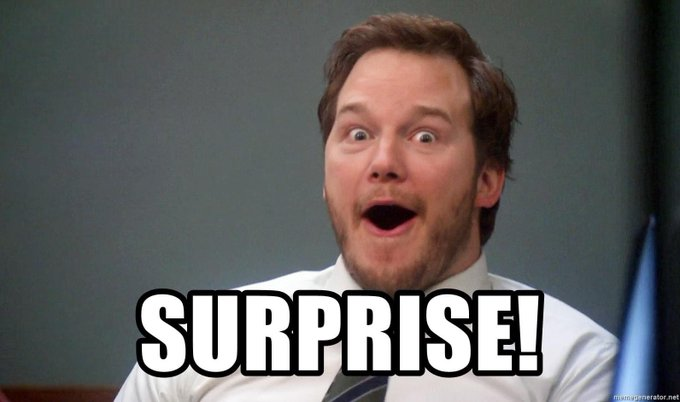

### 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [53]:
sample = pd.read_csv("data/sample_submission.csv")

In [54]:
sample.head()

,laptop_ID,Price_in_euros
0,209,1949.1
1,1281,805.0
2,1168,1101.0
3,1231,1293.8
4,1020,1832.6


In [55]:
sample.shape

(391, 2)

### 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [56]:
submission = pd.DataFrame({"laptop_ID": X_pred.index, "Price_in_euros": predictions_submit})

In [57]:
submission.head()

,laptop_ID,Price_in_euros
0,209,1591.922729
1,1281,299.505035
2,1168,478.442108
3,1231,847.412048
4,1020,929.722412


In [58]:
submission.shape

(391, 2)

# Cambiar nombre de la ruta!!!

In [59]:
submission.to_csv("./data/submission_XGMBoost.csv", index=False)

### 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [60]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Iván y Manuel: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `laptops_test.csv`. Lloramos.")

In [61]:
chequeador(submission)

You're ready to submit!
